## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## Load Data

In [9]:
clinical_data = pd.read_csv("/mnt/new-nas/work/data/npsad_data/vivek/Metadata/clinical_metadata_v2_lates.csv")
plaque_counts = pd.read_csv("/mnt/new-nas/work/data/npsad_data/vivek/csv_merged_data/final_quantify_new.csv")

In [10]:
clinical_data.head(2)

,SubID,Brain_bank,Age,Sex,Sex_chr_aneuploidy,Ethnicity,Dx,pH,PMI,Death_Time,...,LewyDorsalVValue,CDR_Memory,CDR_Orientation,CDR_Judgement,CDR_Community,CDR_HomeHobbies,CDR_PersonalCare,CDR_SumBoxes,Cognitive_Resilience,Cognitive_and_Tau_Resilience
0,M00_1061,MSSM,40.0,Male,NaN,Black,Harry's plaintext: CVD+BPD | CERAD_1: Vascular...,6.87,11.333333,NaN,...,0.0,0.0,0.0,1.0,1.0,0.5,0.0,3.5,NaN,NaN
1,M00_1062,MSSM,60.0,Female,NaN,Hispanic,Harry's plaintext: CVD | CERAD_1: Vascular dis...,6.27,2.900000,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [11]:
# create a patient id column to map with clinical metadata
plaque_counts["XENum"]=plaque_counts["image_name"].apply(lambda l: l.split("_1_")[0])

In [12]:
#merge clinical metadata with model predicted output
plaque_counts_merged = pd.merge(plaque_counts,clinical_data[["Dx","Imaging_XENum","Plq_Mn","Plq_Mn_MFG","MidPlaquesValue","MidPlaquesWCoresValue","CDRScore","prs_AD2","ApoE_gt"]], left_on="XENum", right_on="Imaging_XENum", how = "left")

In [26]:
sample_counts = plaque_counts_merged['ApoE_gt'].value_counts()
sample_counts


33.0    40
34.0    27
44.0     5
23.0     4
24.0     2
Name: ApoE_gt, dtype: int64

In [13]:
# plaque_counts_merged.to_csv('test.csv',index=False)

In [22]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
data =plaque_counts_merged

# APOE_gt values to analyze
apoe_gt_values = [23, 24, 33, 34, 44]

# Iterate over the APOE_gt values and calculate the mean total_plaques
mean_plaques = {}
for apoe_gt in apoe_gt_values:
    filtered_data = data[data['ApoE_gt'] == apoe_gt]
    mean_plaques[apoe_gt] = filtered_data['total_caa_plaques'].mean()

# Check if there is any difference in total_plaques
for apoe_gt1 in apoe_gt_values:
    for apoe_gt2 in apoe_gt_values:
        if apoe_gt1 != apoe_gt2:
            if mean_plaques[apoe_gt1] != mean_plaques[apoe_gt2]:
                print(f"There is a difference in total plaques between APOE_gt {apoe_gt1} and {apoe_gt2}.")
                print(f"Mean total plaques for APOE_gt {apoe_gt1}: {mean_plaques[apoe_gt1]}")
                print(f"Mean total plaques for APOE_gt {apoe_gt2}: {mean_plaques[apoe_gt2]}")



There is a difference in total plaques between APOE_gt 23 and 24.
Mean total plaques for APOE_gt 23: 80.75
Mean total plaques for APOE_gt 24: 84.5
There is a difference in total plaques between APOE_gt 23 and 33.
Mean total plaques for APOE_gt 23: 80.75
Mean total plaques for APOE_gt 33: 32.8
There is a difference in total plaques between APOE_gt 23 and 34.
Mean total plaques for APOE_gt 23: 80.75
Mean total plaques for APOE_gt 34: 33.666666666666664
There is a difference in total plaques between APOE_gt 23 and 44.
Mean total plaques for APOE_gt 23: 80.75
Mean total plaques for APOE_gt 44: 101.0
There is a difference in total plaques between APOE_gt 24 and 23.
Mean total plaques for APOE_gt 24: 84.5
Mean total plaques for APOE_gt 23: 80.75
There is a difference in total plaques between APOE_gt 24 and 33.
Mean total plaques for APOE_gt 24: 84.5
Mean total plaques for APOE_gt 33: 32.8
There is a difference in total plaques between APOE_gt 24 and 34.
Mean total plaques for APOE_gt 24: 84.

Diffuse

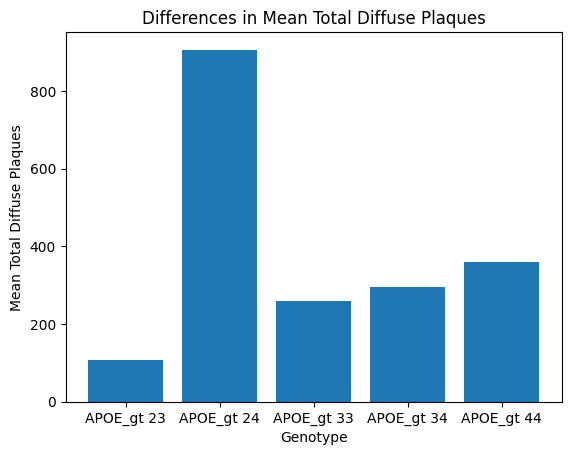

In [19]:


# Define the data
categories = ['APOE_gt 23', 'APOE_gt 24', 'APOE_gt 33', 'APOE_gt 34', 'APOE_gt 44']
mean_total_plaques = [106.25, 906.0, 260.075, 296.44444444444446, 359.8]

# Create the bar plot
plt.bar(categories, mean_total_diffuse_plaques)

# Add labels and title
plt.xlabel('Genotype')
plt.ylabel('Mean Total Diffuse Plaques')
plt.title('Differences in Mean Total Diffuse Plaques')

# Display the plot
plt.show()


Core

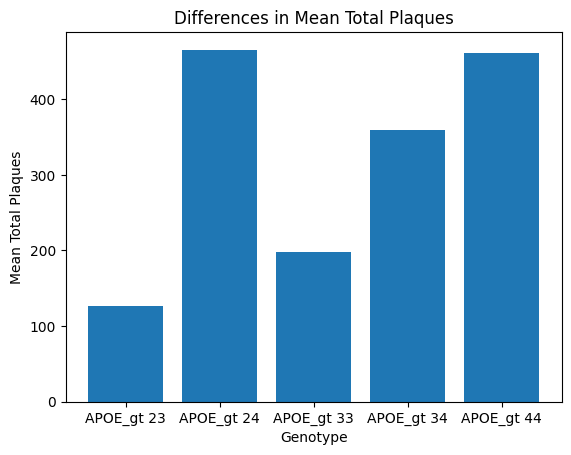

In [21]:
import matplotlib.pyplot as plt

# Define the data
categories = ['APOE_gt 23', 'APOE_gt 24', 'APOE_gt 33', 'APOE_gt 34', 'APOE_gt 44']
mean_total_plaques = [126.75, 465.5, 197.45, 359.2962962962963, 461.8]

# Create the bar plot
plt.bar(categories, mean_total_plaques)

# Add labels and title
plt.xlabel('Genotype')
plt.ylabel('Mean Total Plaques')
plt.title('Differences in Mean Total Plaques')

# Display the plot
plt.show()


CAA

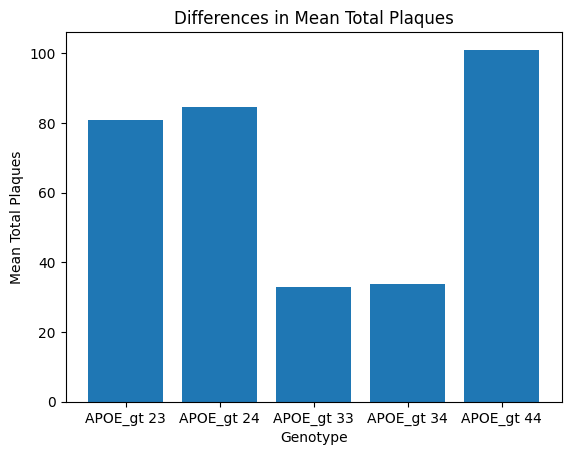

In [23]:
import matplotlib.pyplot as plt

# Define the data
genotypes = ['APOE_gt 23', 'APOE_gt 24', 'APOE_gt 33', 'APOE_gt 34', 'APOE_gt 44']
mean_total_plaques = [80.75, 84.5, 32.8, 33.666666666666664, 101.0]

# Create the bar plot
plt.bar(genotypes, mean_total_plaques)

# Add labels and title
plt.xlabel('Genotype')
plt.ylabel('Mean Total Plaques')
plt.title('Differences in Mean Total Plaques')

# Display the plot
plt.show()
